In [2]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
from sympy.plotting import plot
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
%%html
<style> table {display: block} </style>

# Question 1

The lower triangular matrix $A \in \mathbb{R}^{n\times n}$ has ones on the main diagonal, all other nonzero entries are equal to $-1$. $B \in \mathbb{R}^{n\times n}$ is a matrix consisting of all ones in the last column above the diagonal entry, zeros otherwise. 

Find the $LU$ decomposition of $M = A+B$.

Provide the max norm of the factors!

## Solution


$$A = \begin{pmatrix}
1 & 0 & 0 & \cdots & 0\\
-1 & 1 & 0 &\cdots & 0\\
-1 & -1 & 1 & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
-1 & -1 & -1 & \cdots & 1\\
\end{pmatrix},
B = \begin{pmatrix}
0 & 0 & 0 & \cdots & 1\\
0 & 0 & 0 &\cdots & 1\\
0 & 0 & 0 & \cdots & 1\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 1\\
0 & 0 & 0 & \cdots & 0\\
\end{pmatrix}$$

$$
M = A+B= \begin{pmatrix}
1 & 0 & 0 & \cdots & 1\\
-1 & 1 & 0 &\cdots & 1\\
-1 & -1 & 1 & \cdots & 1\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
-1 & -1 & -1 & \cdots & 1\\
\end{pmatrix}$$

The matrix is quite big. We therefore take a small example to see if there is a pattern.

If we take for $n=4$, 

$$
M = A+B= \begin{pmatrix}
1 & 0 & 0 &  1\\
-1 & 1 & 0 & 1\\
-1 & -1 & 1 & 1\\
-1 & -1 & -1 & 1\\
\end{pmatrix}$$

Finding the $LU$ decomposition


|             |   | |
| :-----             | :-      | :- |
||$$\begin{pmatrix}1 & 0 & 0 &  1\\-1 & 1 & 0 & 1\\-1 & -1 & 1 & 1\\-1 & -1 & -1 & 1\end{pmatrix}$$|  $= M$ |
|$$L_1 = \begin{pmatrix}1&0&0&0\\1&1&0&0\\1&0&1&0\\1&0&0&1\end{pmatrix}$$ | $$\begin{pmatrix}1&0&0&1\\0&1&0& 2\\0&-1&1&2\\0&-1&-1&2\end{pmatrix}$$| $= L_1A$|
|$$L_2 = \begin{pmatrix}1&0&0&0\\0&1&1&0\\0&1&1&0\\0&1&0&1\end{pmatrix}$$| $$\begin{pmatrix}1 & 0& 0& 1\\0&1&0& 2\\0&0&1&4\\0&0&-1&4\end{pmatrix}$$| = $L_2L_1A$ |
|$$L_3 = \begin{pmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&1&1\end{pmatrix}$$| $$\underbrace{\begin{pmatrix}1 & 0& 0& 1\\0&1&0& 2\\0&0&1&4\\0&0&0&8\end{pmatrix}}_{U}$$|$ = L_3L_2L_1A$|


$L_3L_2L_1A = U$

$\rightarrow A = \underbrace{(L_3 L_2 L_1)^{-1}}_{L}U$

$\rightarrow L = \begin{pmatrix}1&0&0&0\\-1&1&0&0\\-1&-1&1&0\\-1&-1&-1&1\end{pmatrix}$

$\rightarrow U = \begin{pmatrix}1 & 0& 0& 1\\0&1&0& 2\\0&0&1&4\\0&0&0&8\end{pmatrix}$

$\Vert L \Vert_{\mathrm{max}} = n\cdot \mathrm{max}\vert L_{ij}\vert = n\times1$

$\Vert U \Vert_{\mathrm{max}} = n\cdot \mathrm{max}\vert U_{ij}\vert = n\times2^{n-1}$

# Question 2

Let G be the tridiagonal matrix

$$G = -\mathrm{diag}(ov, -1) + 2*\mathrm{eye}(n) - \mathrm{diag}(ov + 1)$$

with $ov = ones(n-1, 1)$ (Matlab notation).

Solve the linear system $Gx=b$ with $b=\mathrm{ones}(n,1)$ for $n=3$, $n=7$ and $n=15$.

## Solution

$$
G = \begin{pmatrix}
2 & -1 & 0 & \cdots & 0 & 0&0\\
-1 & 2 & 0 &\cdots & 0 & 0&0\\
0 & -1 & 1 & \cdots & 0 & 0&0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots &2& -1 &0\\
0 & 0 & 0 & \cdots & 0 &-1& 2\\
\end{pmatrix}$$

### Side Note:

The matrix $G$ is the $2^{nd}$ derivative approximation in finite difference method $\frac{\partial^2u}{\partial x^2}$.

$$\frac{\partial u}{\partial x} = \frac{u_{i+1} - u_{i}}{\Delta x}$$

$$\frac{\partial}{\partial x} \left(\frac{\partial u}{\partial x}\right) = \frac{u_{i+1} - 2u_{i} + u_{i-1}}{\Delta x^2}$$

$$
\begin{pmatrix}
2 & -1 & 0 & \cdots & 0 & 0&0\\
-1 & 2 & 0 &\cdots & 0 & 0&0\\
0 & -1 & 1 & \cdots & 0 & 0&0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots &2& -1 &0\\
0 & 0 & 0 & \cdots & 0 &-1& 2
\end{pmatrix}
\begin{pmatrix}
u_1\\
u_2\\
u_3\\
\vdots\\
u_{n-1}\\
u_n
\end{pmatrix} = 
\begin{pmatrix}
-\Delta  x^2\\
-\Delta  x^2\\
-\Delta  x^2\\
\vdots\\
-\Delta  x^2\\
-\Delta  x^2
\end{pmatrix}$$

For $n = 3$, 

$$
G = \begin{pmatrix}
2 & -1 & 0\\
-1 & 2 & 0 \\
0 & -1 & 1\\
\end{pmatrix}, b=
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}$$

We are therefore required to solve


$$
G = \begin{pmatrix}
2 & -1 & 0\\
-1 & 2 & 0 \\
0 & -1 & 1\\
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}=
\begin{pmatrix}
1\\
1\\
1
\end{pmatrix}$$

$
\begin{pmatrix}
2 & -1 & 0 & | & 1 \\
-1 & 2 & -1 & | & 1 \\
0 & -1 & 2 & | & 1  
\end{pmatrix}
\xrightarrow[]{R_2 + \frac{1}{2}R_1 \rightarrow R_2}
\begin{pmatrix}
2 & -1 & 0 & | & 1\\
0 & \frac{3}{2} & -1 & | & \frac{3}{2} \\
0 & -1 & 2 & | & 1 
\end{pmatrix}
\xrightarrow[]{R_3 + \frac{2}{3}R_1 \rightarrow R_3}
\begin{pmatrix}
2 & -1 & 0 & | & 1\\
0 & \frac{3}{2} & -1 & | & \frac{3}{2} \\
0 & 0 & \frac{4}{3} & | & 2
\end{pmatrix}
$

$\rightarrow x_3 = \frac{2}{4/3} = \frac{3}{2}$ 

$\frac{3}{2} x_2 - x_3 = \frac{3}{2} \rightarrow x_2 = 2$ 

$2 x_1 - x_2 = 1 \rightarrow x_1 = \frac{3}{2}$

$\textbf{x}^{(3)} = \begin{pmatrix}\frac{3}{2}\\ 2 \\ \frac{3}{2}\end{pmatrix}, \hspace{5mm} \textbf{x}^{(5)} = \begin{pmatrix}2.5\\ 4 \\ 4.5\\ 4\\2.5\end{pmatrix}, \hspace{5mm} \textbf{x}^{(9)} = \begin{pmatrix} 4.5\\ 8 \\ 10.5\\ 12 \\112.5\\12\\10.5\\8\\4.5\end{pmatrix}$


In [5]:
# code
# Generally, solving physical problems numerically, involves the assembly of the matrix (which is representative of the
# discretization method and mesh) and the left hand side which represents contains the initial and/or boundary conditions
# Once the matrix and vector are assembled, the problem can then be solved with any desired method.

# Assembling matrix G
# Assembling vector b
# solving the linear system of equations

def gauss(K, b):
    flops_count = 0
    
    m = len(K)
    # Augument matrix A with vector b
    A = np.c_[K, b]
    
    m = len(A)
    assert all([len(row) == m + 1 for row in A[1:]]), "Matrix rows have non-uniform length"
    n = m + 1
    
    for k in range(m):
        # get pivots
        pivots = [abs(A[i][k]) for i in range(k, m)]
        
        # get max of pivots
        i_max = pivots.index(max(pivots)) + k
        
        # Check for singular matrix
        assert A[i_max][k] != 0, "Matrix is singular!"
        
        # Swap rows
        A[k], A[i_max] = A[i_max], A[k]
        
        # check if echelon form is reached as a condition to exit loop
        last_row = A[m-1:][0]
        if all([p == 0 for p in last_row[0:m-1]]):
            break
        
        for i in range(k + 1, m):
            f = A[i][k] / A[k][k] # one flop
            flops_count += 1
            for j in range(k + 1, n):
                A[i][j] -= A[k][j] * f # 2 flops
                flops_count += 2
        
            # Fill lower triangular matrix with zeros:
            A[i][k] = 0
    
    # Solve equation Ax=b for an upper triangular matrix A         
    x = []
    for i in range(m - 1, -1, -1):
        x.insert(0, A[i][m] / A[i][i]) # 1 flop
        flops_count += 1
        for k in range(i - 1, -1, -1):
            A[k][m] -= A[k][i] * x[0] # 2 flops
            flops_count += 2
    return x, flops_count


[14.999999999999984, 28.999999999999968, 41.99999999999995, 53.99999999999994, 64.99999999999993, 74.99999999999991, 83.99999999999989, 91.99999999999986, 98.99999999999984, 104.99999999999983, 109.99999999999983, 113.9999999999998, 116.99999999999977, 118.99999999999974, 119.99999999999972, 119.9999999999997, 118.99999999999969, 116.99999999999967, 113.99999999999966, 109.99999999999966, 104.99999999999967, 98.99999999999969, 91.99999999999973, 83.99999999999977, 74.9999999999998, 64.99999999999983, 53.999999999999865, 41.99999999999989, 28.99999999999993, 14.999999999999964] 19315


<IPython.core.display.Javascript object>


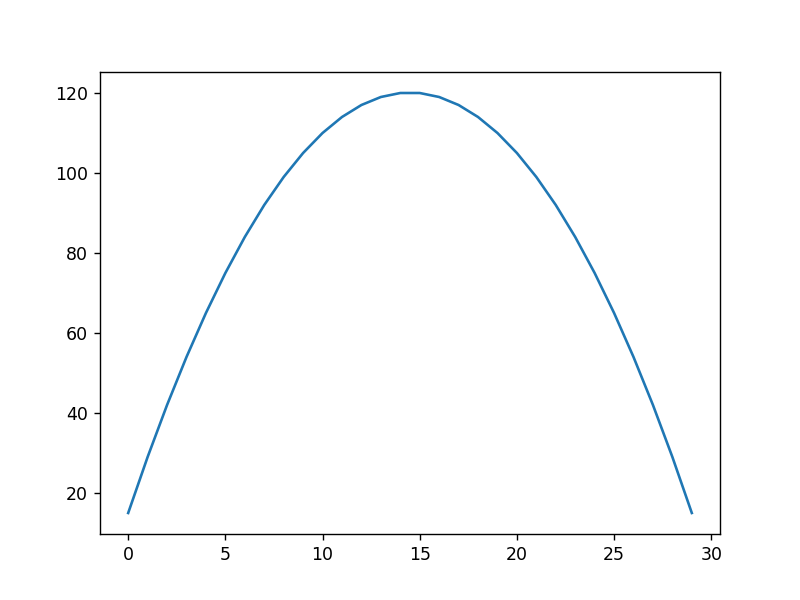

In [9]:
n = 30  # size of matrix

# Assemble the matrix
a = -1 * np.ones(n - 1)  # upper and lower diagonals
b = 2 * np.ones(n)  # main diagonal
G = np.diag(a, -1) + np.diag(b, 0) + np.diag(a, 1)

# Assemble the vector b
b = np.ones(n)
x, flops = gauss(G, b)
print(x, flops)

plt.close()
plt.plot(x)
plt.show()

# Question 3

If $x$ is the solution of the previous problem with $n = 1023$, give an approximation to $x_{512}$!

## Solution

To solve the problem, we find the analytical solution of $\frac{\partial ^2 u}{\partial x^2} = -1.$ Assume in the previous problem we had $\Delta x=1$ and $u_0=u_{1024}=0$ where we want to calculate $u_{512}$.

$\frac{\partial ^2 u}{\partial x^2} = -1 \rightarrow \frac{\partial u}{\partial x}= -x + b \rightarrow u = -\frac{x^2}{2} + bx + c$

$u(0) = 0 \rightarrow c = 0$

$u(1024) = 0 \rightarrow -\frac{1024^2}{2} + b(1024) \rightarrow b = \frac{1024}{2}$

$u = -\frac{x^2}{2} + \frac{1024}{2}x$

$\rightarrow u(512) = -\frac{512^2}{2} + \frac{1024}{2}(512) = 131072$

# Question 4

The weighted $l^2$ norm $\Vert\cdot\Vert_G$ with weight $G$ is defined by
$$\Vert x\Vert_G^2 = x^TGx,$$

where $G$ is a symmetric and positive definite matrix.

Calculate the maximum and minimum of the $G$-norm over all vectors $x$ with unit $l^2$ norm (classical Euclidean),

($G$ from problem 2).

## Solution


<html><img align="right" width="500" height="400" src="https://lh6.googleusercontent.com/dUTedbtEUTjL0B3ZoT1Grja2FUT8i_FEIiFPP4aEZPbDY1TkJNbjN5dKMPNXLW-pD3L9lgJMr0wbQMjp0K5z=w1920-h929-rw"></html>
All vectors with unit norm are $\Vert x\Vert_2 = 1 \rightarrow (x_1^2+x_2^2+x_3^2+\cdots+x_n^2)^{\frac{1}{2}} = 1$

In $\mathbb R^2$, this represents a unit circle. 

When a vector norm is weighted with the matrix $G$, the result forms and ellipse (in 2-D), $x^TGx$ rotated and or stretched on the axis. The radii of the ellipse are $\sqrt{\lambda_{\mathrm{max}}(G^TG)}\Vert x \Vert_2$ and $\sqrt{\lambda_{min}(G^TG)}\Vert x \Vert_2$.



If $G$ is symmetric, $\lambda_{min}\underbrace{\Vert x\Vert_2^2}_{1} \le x^TGx \le \lambda_{max}\underbrace{\Vert x\Vert_2^2}_{1} \rightarrow \lambda_{min} \le  x^TGx \le \lambda_{max}$

In problem 2 for 2D case $G = \begin{pmatrix}2 & -1 \\-1 & 2\end{pmatrix}$ and $\Vert x \Vert_2=1$

$\max x^TGx = \lambda_{max}(G) = 3$

$\min x^TGx = \lambda_{min}(G) = 1$

Matrix([[x1*(3*x1 - 3*x2) + x2**2]])


<IPython.core.display.Javascript object>


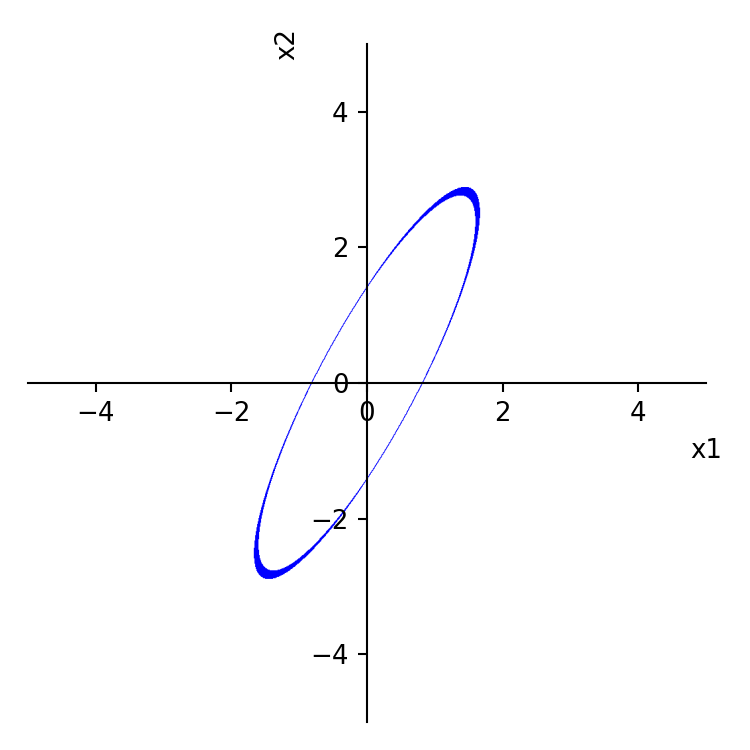

In [17]:
# some toy example to play with
def ball_and_squash(A, x):
    # x vector defines the ball
    # G matrix defines the force
    
    # convert matrix to sympy matrix
    A = Matrix(A)
    x = Matrix(x)
    # get equation coeficients
    eq = x.T*A*x
    print(eq)
    return eq[0]

# define symbolab symbols
x1, x2 = symbols("x1 x2")
x = [x1, x2]
G = [[3,0], [-3, 1]]
f = ball_and_squash(G, x)

plt.rcParams['figure.figsize'] = 4, 4 # some figure formatting
p1 = plot_implicit(Eq(f, 2), show=True) #, (x1, -1.5, 1.5), (x2, -1.5, 1.5)

In [119]:
GTG = np.matmul(np.array(G).T, np.array(G))
eig = np.linalg.eig(GTG)
print(eig)

(array([9., 1.]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))


# Question 5

What is the shape of the ball

$$\Vert x-b\Vert_G\le2$$

with $G$ and $b$ from task 2 and 3 and $n=3$?

## Solution

Quadratic functions: $g_{11}x_1^2 + g_{12}x_1x_2 + \cdots + g_{nn}x_n^2 = \begin{pmatrix}x_1\\ \vdots \\ x_n\end{pmatrix}^T
\begin{pmatrix}g_{11} & \cdots & g_{1n}\\
\vdots & \vdots & \vdots \\
g_{n1} & \cdots & g_{nn} 
\end{pmatrix}
\begin{pmatrix}x_1 \\ \vdots \\ x_n\end{pmatrix} = x^TGx$

If $G$ is symmetric positive definite, then $x^TG \le d$ is an ellipsoid $\rightarrow \Vert G^{\frac{1}{2}}x\Vert^2 \le d$

The axis of ellipsoid created by $x^TGx \le d$ is $\sqrt{\frac{d}{\lambda_1(G)}}, \sqrt{\frac{d}{\lambda_2(G)}}, \sqrt{\frac{d}{\lambda_3(G)}}$

$\mathrm{eigs}(G) = \mathrm{eigs}\begin{pmatrix}2 & -1 & 0\\-1 & 2 & -1 \\ 0 & -1 & 2\end{pmatrix} = 3.414, 2, 0.5858$

$b$ determines the center of the ellipse (in 2D) or the ellipsoid (in 3D).

Matrix([[(x1 + 1)*(2*x1 - x2 + 3) + (x2 - 1)*(-x1 + 2*x2 - 3)]])


<IPython.core.display.Javascript object>


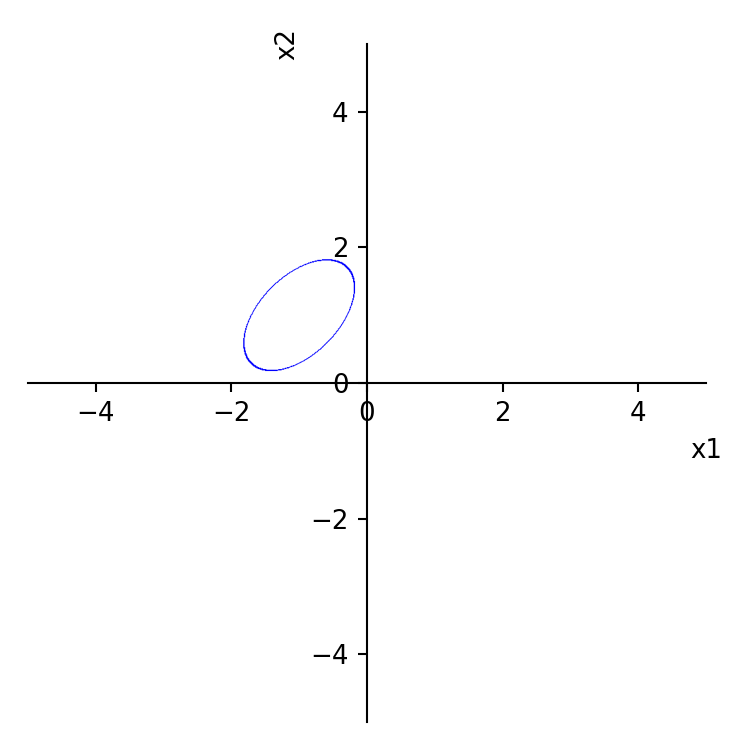

In [19]:
# A 2D example

# define symbolab symbols
x = np.array([x1, x2])
b = np.array([-1, 1])
G = [[2,-1], [-1, 2]]
f = ball_and_squash(G, x-b)

plt.rcParams['figure.figsize'] = 4, 4 # some figure formatting
p1 = plot_implicit(Eq(f, 1), show=True)

# Question 6

Which value of $c$ leads to zero in the second pivot position of the matrix:

$$A = \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1\\
3 & 5 & 1
\end{pmatrix}$$

For exactly that value of $c$, calculate a $PLU$ decomposition such that $PA = LU$!

## Solution

$c = 2$ leads to zero in the second pivot position. The pivot matrix $P$ is identity matrix with the same rows switched as the rows of $A$ are switched in pivoting. 

The strategy used for swapping rows in step $k$ is to find the largest element in the column $k$ below (and including) the diagonal swap its row with row $k$.

If we set $c = 2$,

|             |   | |
| :-----             | :-      | :- |
||$$\begin{pmatrix}1 & 2 & 0\\2 & 4 & 1\\3 & 5 & 1\end{pmatrix}$$|  $= A$ |
|$$P_1 = \begin{pmatrix}0&0&1\\0&1&0\\1&0&0\end{pmatrix}$$ | $$\begin{pmatrix}3 & 5 & 1\\2 & 4 & 1\\1 & 2 & 0\end{pmatrix}$$| $= P_1A$|
|$$L_1 = \begin{pmatrix}1&0&0\\-\frac{2}{3}&1&0\\-\frac{1}{3}&0&1\end{pmatrix}$$| $$\begin{pmatrix}3 & 5 & 1\\0 & \frac{2}{3} & \frac{1}{3}\\0 & \frac{1}{3} & -\frac{1}{3}\end{pmatrix}$$| = $L_1P_1A$ |
|$$L_2 = \begin{pmatrix}1&0&0\\0&1&0\\0&-\frac{1}{2}&1\end{pmatrix}$$| $$\underbrace{\begin{pmatrix}3 & 5 & 1\\0 & \frac{2}{3} & \frac{1}{3}\\0 & 0 & -\frac{1}{2}\end{pmatrix}}_{U}$$|$ = L_2L_1PA$|

$
U = \begin{pmatrix}3 & 5 & 1\\0 & \frac{2}{3} & \frac{1}{3}\\0 & 0 & -\frac{1}{2}\end{pmatrix}, \hspace{5mm} L = \begin{pmatrix}1&0&0\\\frac{2}{3}&1&0\\\frac{1}{3}&\frac{1}{2}&1\end{pmatrix}, \hspace{5mm} P = \begin{pmatrix}0&0&1\\0&1&0\\1&0&0\end{pmatrix}
$


### Extra Information

$L_3P_3L_2P_2L_1P_1A = U
\\
L_3P_3L_2P_2L_1P_1 \rightarrow L_3'L_2'L_1'P_3P_2P_1$

where

$L_3'=L_3, L_2' = P_3L_2P_3^{-1}, L_1'=P_3P_2L_1P_2^{-1}P_3^{-1}$

$L_i'$ has the same structure as $L_i$

$\rightarrow (L_{m-1}' \cdots L_2'L_1')(P_{m-1} \cdots P_1)A = U$

Remember that to solve $Ax=b$ with the $LU$ factorization with pivoting, one has to change the right hand side rows according to the pivoting.

$LU = PA\\
Ax = b \rightarrow PAx = Pb\\
\rightarrow LUx = Pb$